In [1]:
import gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
class Q:
    def __init__(self, env):
        self.env = env
        self.env_low = self.env.observation_space.low # 位置と速度の最小値
        self.env_high = self.env.observation_space.high #　位置と速度の最大値
        self.env_dx = (self.env_high - self.env_low) / 40 # 50等分
        self.q_table = np.zeros((40,40,3))
        
    def get_status(self, _observation):
        position = int((_observation[0] - self.env_low[0])/self.env_dx[0])
        velocity = int((_observation[1] - self.env_low[1])/self.env_dx[1])
        return position, velocity
    
    def policy(self, s, epsilon = 0.1):
        if np.random.random() <= epsilon:
            return np.random.randint(3)
        else:
            p, v = self.get_status(s)
            if self.q_table[p][v][0] == 0 and self.q_table[p][v][1] == 0 and self.q_table[p][v][2] == 0:
                return np.random.randint(3)
            else:
                return np.argmax(self.q_table[p][v])
    
    def learn(self, time = 1000, alpha = 0.2, gamma = 0.99):
        log = []
        for _ in tqdm(range(time)):
            total = 0
            s = self.env.reset()
            done = False
            
            while not done:
                a = self.policy(s)
                next_s, reward, done, _ = self.env.step(a)
                total += reward
                
                p, v = self.get_status(next_s)
                G = reward + gamma * max(self.q_table[p][v])
                
                p,v = self.get_status(s)
                self.q_table[p][v][a] += alpha*(G - self.q_table[p][v][a])
                s = next_s

            log.append(total)
        return plt.plot(log)

    def show(self):
        s = self.env.reset()
        self.env.render()
        done = False
        while not done:
            p, v = self.get_status(s)
            s, _, done, _ = self.env.step(np.argmax(self.q_table[p][v]))
            self.env.render()
                
        self.env.reset()
        self.env.close()
            
            
        

In [3]:
env = gym.make('MountainCar-v0')
agent = Q(env)

100%|██████████| 10000/10000 [03:32<00:00, 47.07it/s]


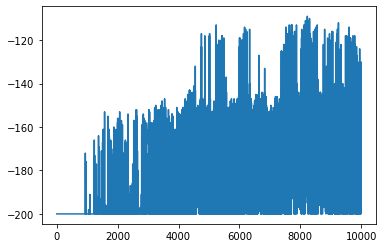

In [4]:
agent.learn(time = 10000, alpha = 0.2, gamma = 0.99)

In [14]:
agent.show()

In [ ]:
exit()
